# Fire Hazard Incidents Analytics Pipeline

## Importing Required Libraries

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

## Creating Spark Session and using all available cores

In [8]:
%%time
spark = SparkSession \
    .builder \
    .appName("532: Project") \
    .config("local[4]") \
    .getOrCreate()

CPU times: total: 0 ns
Wall time: 40 ms


## Loading civilian casuality, firefighter casuality, fire incidents and basic module data

In [9]:
%%time
civilian_casualities_df = spark.read.options(delimiter="^", header=True).csv("civiliancasualty.txt")
basic_module_df = spark.read.options(delimiter="^", header=True).csv("basicincident.txt")

CPU times: total: 0 ns
Wall time: 658 ms


In [10]:
%%time
# Dropping null values in loss tables and finding total loss
basic_module_df = basic_module_df.na.drop(subset=("PROP_LOSS","CONT_LOSS"))
total_loss = basic_module_df.groupBy("INCIDENT_KEY").agg(F.sum(basic_module_df.PROP_LOSS + basic_module_df.CONT_LOSS).alias("TOTAL_LOSS"))

CPU times: total: 0 ns
Wall time: 104 ms


In [11]:
%%time
# Finding Civilian Injury Severity vs. Dollar Loss
civilian_dollar_loss = total_loss.join(civilian_casualities_df, total_loss.INCIDENT_KEY == civilian_casualities_df.INCIDENT_KEY)
cdl_df = civilian_dollar_loss.groupBy("SEV").agg(F.avg("TOTAL_LOSS").alias("AVG_LOSS"))


CPU times: total: 0 ns
Wall time: 63.5 ms


CPU times: total: 78.1 ms
Wall time: 5.33 s


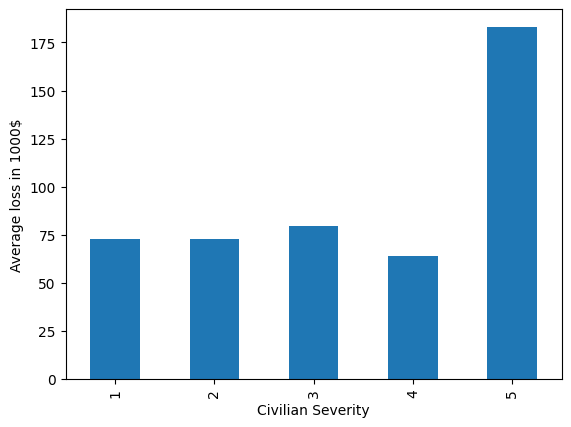

In [12]:
%%time
p_cdl_df = cdl_df.toPandas()
p_cdl_df["AVG_LOSS"] = p_cdl_df["AVG_LOSS"]/1000
p1 = p_cdl_df.drop([2]).sort_values(by="SEV").plot(x="SEV", y="AVG_LOSS", xlabel="Civilian Severity", ylabel = "Average loss in 1000$", kind="bar", legend = False)
fig1 = p1.get_figure()
fig1.savefig("civilian_dollar_loss.png")

In [13]:
from pymongo import MongoClient

In [14]:
mongoclient = MongoClient("mongodb://localhost:27017")

In [16]:
test = mongoclient["test"]

In [19]:
test_c = test["t1"]

In [20]:
test_c.insert_one({"a":1})